# Image restoration

## Inpainting
- Reconstructing lost parts of images
- Looking at the non-damaged regions i.e exploiting the information presented in non-damaged regions of the image

![image-5](image-5.png)

## Masks
- The scikit-image inpainting function requires the mask to be an array of pixels that need to be inpainted. This mask has to be the same shape as one of the image channels. Unknown pixels have to be represented with 1 and known pixels with 0. So we add the missing pixels by copying the image and turning the pixels into a numpy array of zeros, meaning it's empty. We only copy the width and height dimensions of the image, excluding the color dimension, in this case RGB-3. And then, set the 1s in the specific areas we want to be treated as lost.

![image-6.png](image-6.png)


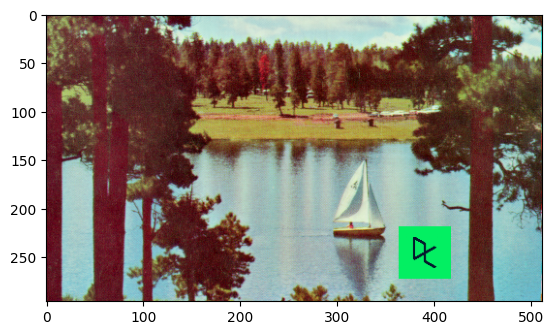

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load image and visualize
image_with_logo = plt.imread('image_with_logo.png')
plt.imshow(image_with_logo)

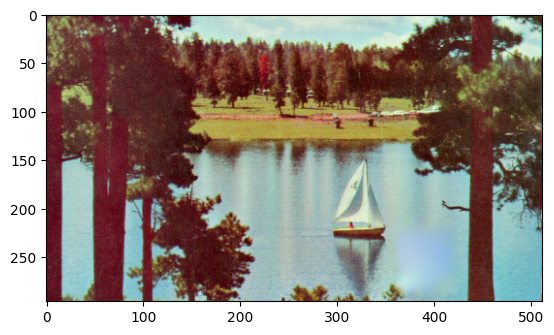

In [2]:
# Perform restoration to remove the logo
from skimage.restoration import inpaint

# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:290, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,
                                  mask,
                                  multichannel=True)

# Show the logo removed images
plt.imshow(image_logo_removed)

# Applying and removing NOISE 

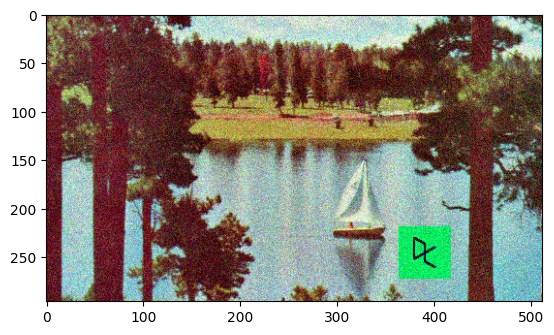

In [3]:
# Import the module and function
from skimage.util import random_noise

# Add noise to the image
noisy_image = random_noise(image_with_logo)

# Show noisy image
plt.imshow(noisy_image)

## Denoising
Denoising algorithms are: 
1. **The total variation filter.** This filter tries to minimize the total variation of the image. It tends to produce “cartoon-like” images, that is, piecewise-constant images. 
2. **Bilateral filtering** smooths images while preserving edges. It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels. 

### Using total variation filter for denoising

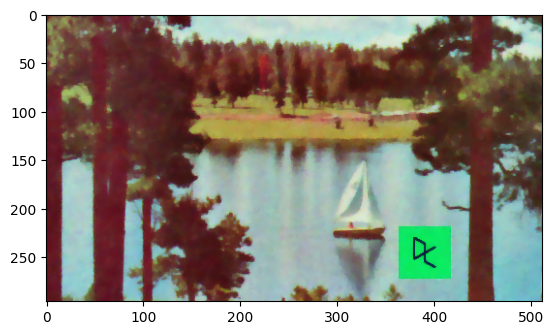

In [4]:
from skimage.restoration import denoise_tv_chambolle

# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image,
                                     weight=0.1, #<- higher the weight, higher is the denoising
                                     multichannel=True)

# Show denoised image
plt.imshow(denoised_image)

### Using bilateral filter for denoising

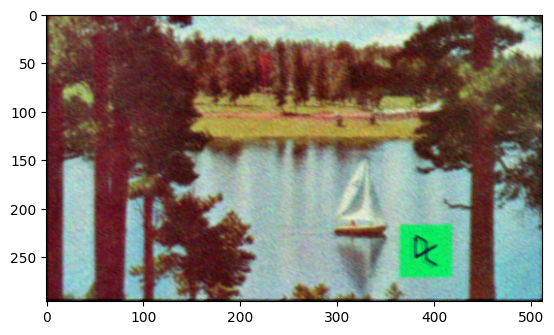

In [5]:
from skimage.restoration import denoise_bilateral

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(noisy_image, multichannel=True)

# Show denoised image
plt.imshow(denoised_image)

# Superpixels & segmentation

- **Superpixels**: A superpixel is a group of connected pixels with similar colors or gray levels. These carry more meaning than their simple pixel grid counterparts.
- **Segmentation**: 
    - Supervised: otsu thresholding
    - Unsupervised: Simple Linear Iterative Clustering (SLIC)

## Simple Linear Iterative Clustering (SLIC)
- It segments the image using a machine learning algorithm called K-Means clustering. It takes in all the pixel values of the image and tries to separate them into a predefined number of sub-regions.

![image-7](image-7.png)


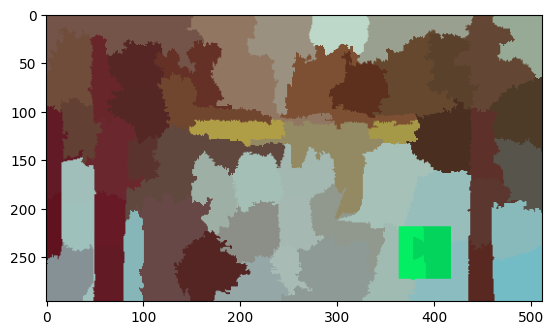

In [7]:
# Import the modules
from skimage.segmentation import slic
from skimage.color import label2rgb

# Obtain the segments
segments = slic(image_with_logo)

# Put segments of top of original image to compare
segmented_image = label2rgb(segments, image_with_logo, kind='avg')

# Show segmented image
plt.imshow(segmented_image)

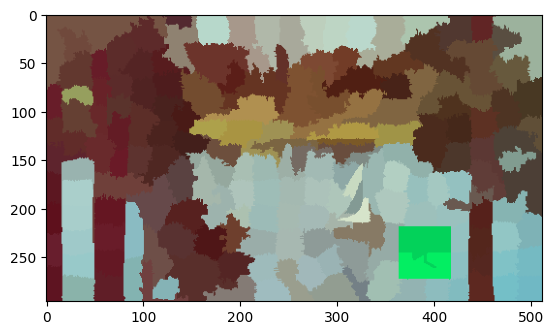

In [8]:
# SLIC with more segments
# Obtain the segments
segments = slic(image_with_logo, n_segments=300)

# Put segments of top of original image to compare
segmented_image = label2rgb(segments, image_with_logo, kind='avg')

# Show segmented image
plt.imshow(segmented_image)

# Finding contours
- Step 1: Transform the image to 2D grayscale
- Step 2: Binarize the image (using thresholding)
- Step 3: Use `find_contours()` to find contours

![image-8](image-8.png)


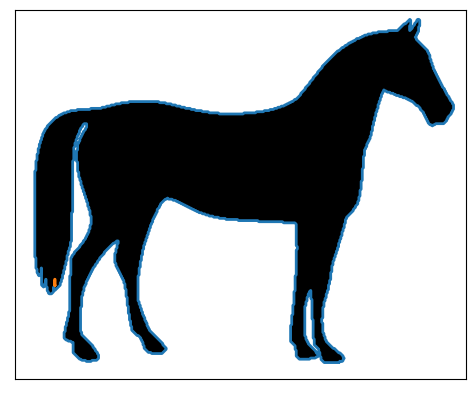

In [11]:
# Import the modules
from skimage import data, measure

# Obtain the horse image
horse_image = data.horse()

# Find the contours with a constant level value of 0.8
contours = measure.find_contours(horse_image, 0.8)

# Shows the image with contours found
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(horse_image, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()